readme_text = """
# 📊 Hierarchical Agglomerative Clustering (HAC) com Visualizações e Avaliações

Este projeto implementa o algoritmo **HAC (Hierarchical Agglomerative Clustering)** utilizando o dataset clássico **Iris**, realizando:

- Pré-processamento
- Geração de dendrogramas
- Avaliação com múltiplas métricas
- Visualização em 2D com PCA

---

## 🔍 O que é HAC?

Hierarchical Agglomerative Clustering é uma técnica de **clusterização hierárquica bottom-up**, onde cada ponto inicia como seu próprio cluster, e as fusões são realizadas até restar apenas um.

O resultado é um **dendrograma**, que pode ser cortado em qualquer altura para obter diferentes números de clusters.

---

## ⚙️ Etapas implementadas

1. **Carregamento do dataset** `Iris` via Scikit-learn
2. **Padronização** dos dados com `StandardScaler`
3. Aplicação dos **métodos de linkage**: `single`, `complete`, `average` e `ward`
4. Geração de **dendrogramas** para cada método
5. Corte dos dendrogramas para formar `k=3` clusters
6. Avaliação dos clusters com:
   - Silhouette Score
   - Davies-Bouldin Index
   - Calinski-Harabasz Index
7. Redução de dimensionalidade com **PCA (2D)**
8. Visualização final dos clusters com `seaborn`

---

## 📈 Métricas de avaliação

| Métrica | Interpretação |
|--------|----------------|
| **Silhouette Score** | Varia de -1 a 1. Quanto mais próximo de 1, melhor. Ideal > 0.5 |
| **Davies-Bouldin Index** | Quanto menor, melhor. Ideal < 0.6 |
| **Calinski-Harabasz Index** | Quanto maior, melhor. Idealmente > 100 |

---

## 🖼️ Visualizações

- **Dendrograma**: mostra visualmente como os pontos foram agrupados hierarquicamente.
- **Gráfico PCA 2D**: visualiza os clusters resultantes após redução de dimensão.

---

## 🧪 Requisitos

- Python 3.x
- pandas
- numpy
- seaborn
- matplotlib
- scikit-learn
- scipy



🔹 Método de linkage: single


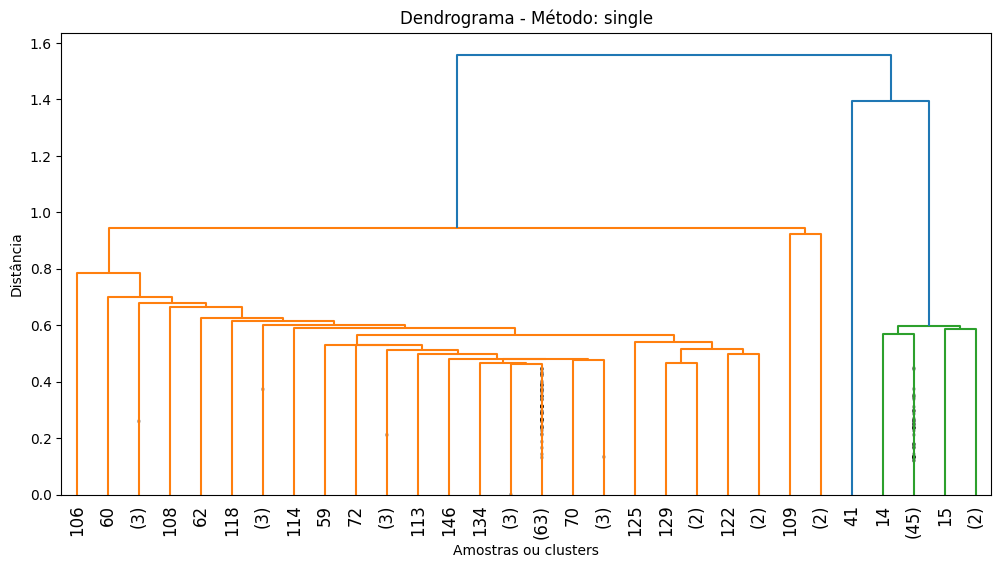

✅ Avaliações para single (k=3):
   • Silhouette Score: 0.5046  → (Intervalo: -1 a 1 | Ideal: > 0.5) → Quanto mais próximo de 1, melhor separação e coesão)
   • Davies-Bouldin Index: 0.4929  → (Intervalo: >= 0 | Ideal: < 0.6) → Quanto MENOR, melhor qualidade do agrupamento)
   • Calinski-Harabasz Index: 131.54  → (Sem limite fixo | Ideal: quanto MAIOR, melhor → valores > 100 geralmente são bons)


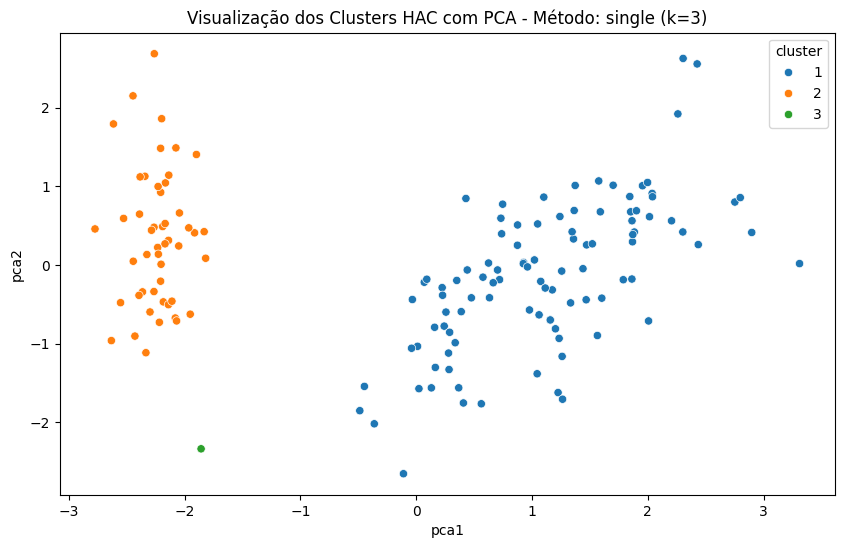


🔹 Método de linkage: complete


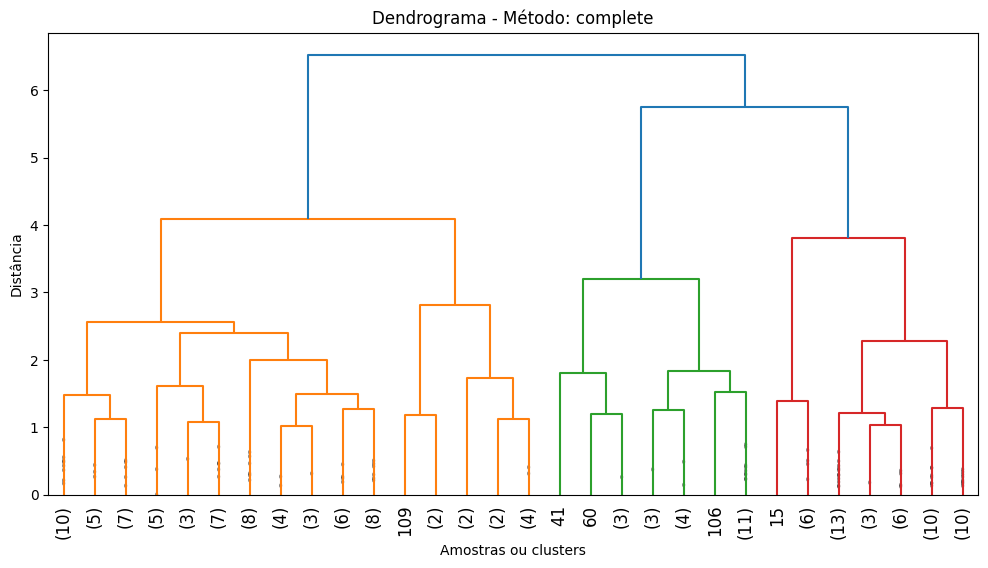

✅ Avaliações para complete (k=3):
   • Silhouette Score: 0.4496  → (Intervalo: -1 a 1 | Ideal: > 0.5) → Quanto mais próximo de 1, melhor separação e coesão)
   • Davies-Bouldin Index: 0.7584  → (Intervalo: >= 0 | Ideal: < 0.6) → Quanto MENOR, melhor qualidade do agrupamento)
   • Calinski-Harabasz Index: 213.08  → (Sem limite fixo | Ideal: quanto MAIOR, melhor → valores > 100 geralmente são bons)


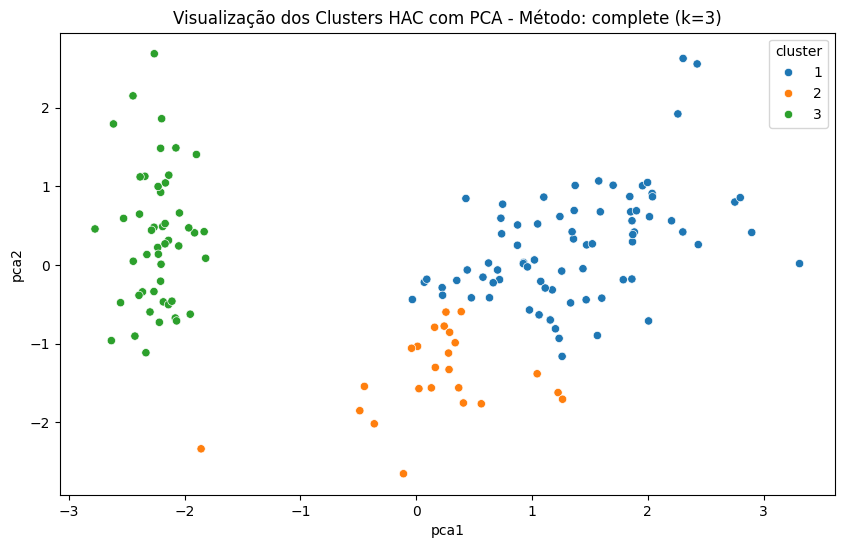


🔹 Método de linkage: average


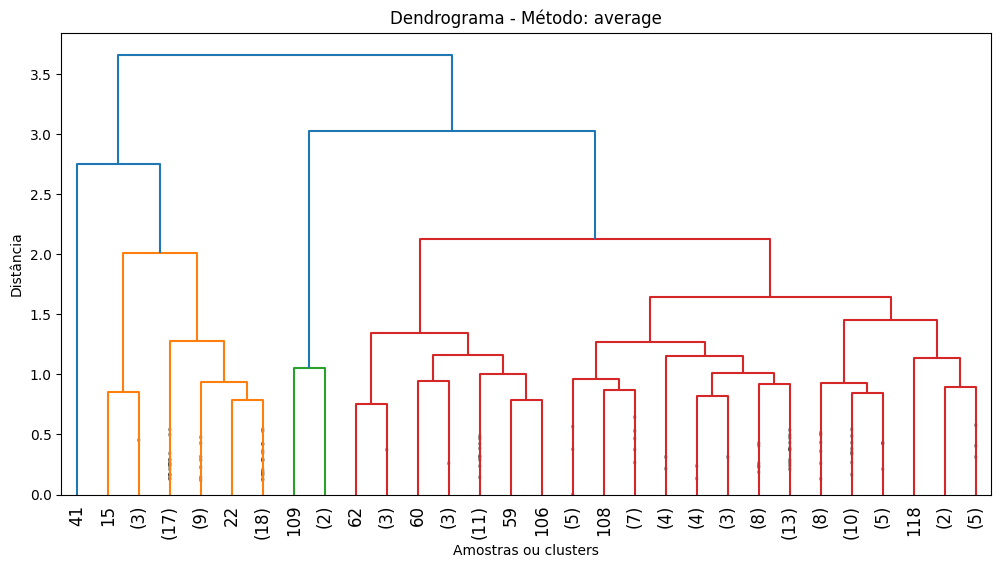

✅ Avaliações para average (k=3):
   • Silhouette Score: 0.4803  → (Intervalo: -1 a 1 | Ideal: > 0.5) → Quanto mais próximo de 1, melhor separação e coesão)
   • Davies-Bouldin Index: 0.5753  → (Intervalo: >= 0 | Ideal: < 0.6) → Quanto MENOR, melhor qualidade do agrupamento)
   • Calinski-Harabasz Index: 149.03  → (Sem limite fixo | Ideal: quanto MAIOR, melhor → valores > 100 geralmente são bons)


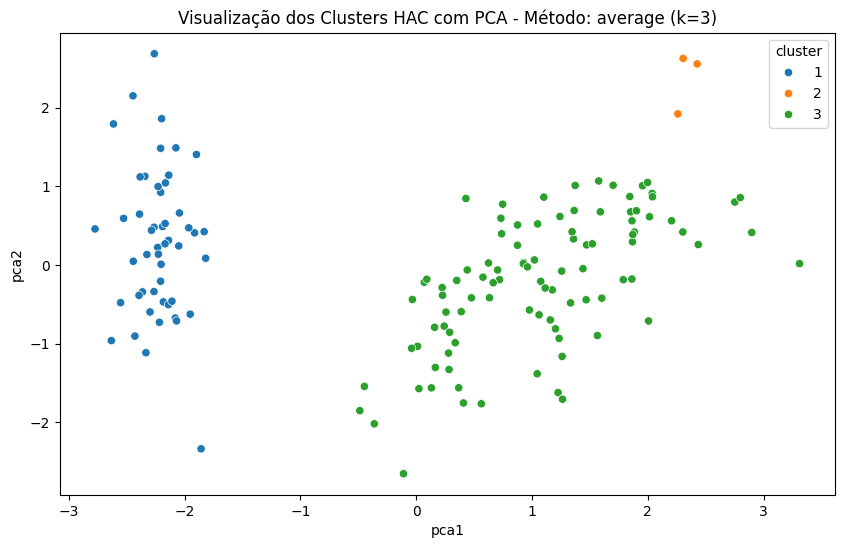


🔹 Método de linkage: ward


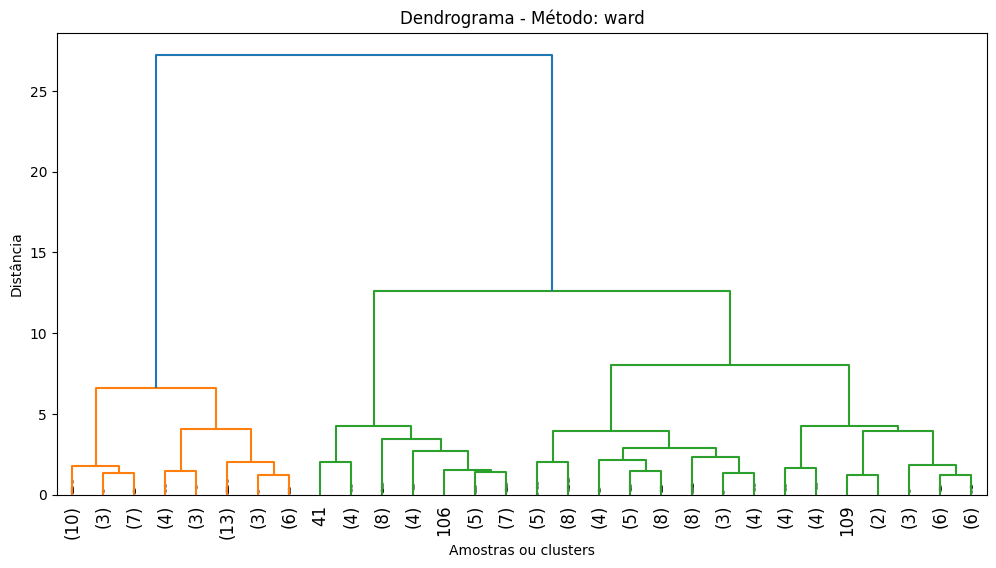

✅ Avaliações para ward (k=3):
   • Silhouette Score: 0.4467  → (Intervalo: -1 a 1 | Ideal: > 0.5) → Quanto mais próximo de 1, melhor separação e coesão)
   • Davies-Bouldin Index: 0.8035  → (Intervalo: >= 0 | Ideal: < 0.6) → Quanto MENOR, melhor qualidade do agrupamento)
   • Calinski-Harabasz Index: 222.72  → (Sem limite fixo | Ideal: quanto MAIOR, melhor → valores > 100 geralmente são bons)


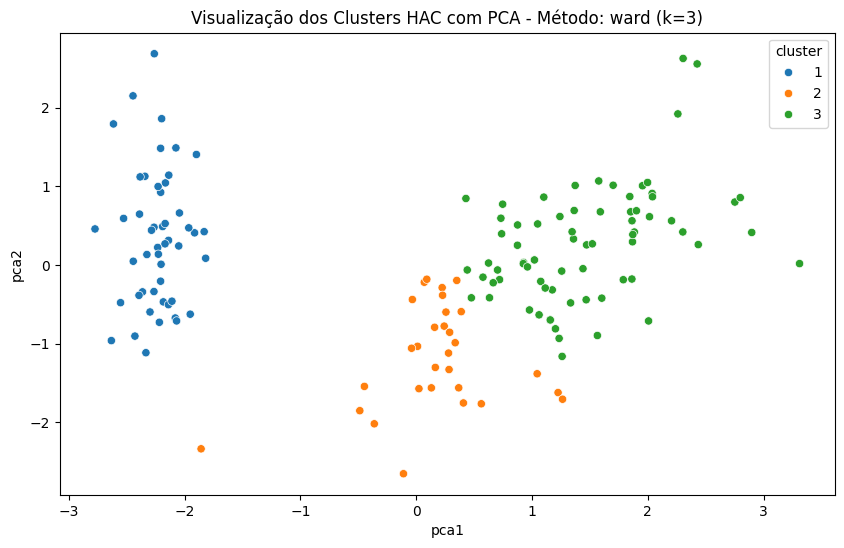


✅ Código finalizado: dendrogramas para todos os métodos, avaliação e visualização concluídas.


In [4]:
# 📊 Exemplo Completo em Python: HAC com Dendrogramas para Todos os Métodos

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 🗕️ Carregar o dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# ⚙️ Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 🔗 Métodos de linkage a serem testados
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    print(f"\n🔹 Método de linkage: {method}")

    # Calcular linkage
    Z = linkage(scaled_data, method=method)

    # 📈 Plotar dendrograma
    plt.figure(figsize=(12, 6))
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=12, show_contracted=True)
    plt.title(f'Dendrograma - Método: {method}')
    plt.xlabel('Amostras ou clusters')
    plt.ylabel('Distância')
    plt.show()

    # ✂️ Cortar dendrograma para definir clusters
    num_clusters = 3
    labels = fcluster(Z, num_clusters, criterion='maxclust')
    df['cluster'] = labels

    # 🧪 Avaliar clusters com múltiplas métricas
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        silhouette = silhouette_score(scaled_data, labels)
        davies = davies_bouldin_score(scaled_data, labels)
        calinski = calinski_harabasz_score(scaled_data, labels)
        print(f'✅ Avaliações para {method} (k={num_clusters}):')
        print(f'   • Silhouette Score: {silhouette:.4f}  → (Intervalo: -1 a 1 | Ideal: > 0.5) → Quanto mais próximo de 1, melhor separação e coesão)')
        print(f'   • Davies-Bouldin Index: {davies:.4f}  → (Intervalo: >= 0 | Ideal: < 0.6) → Quanto MENOR, melhor qualidade do agrupamento)')
        print(f'   • Calinski-Harabasz Index: {calinski:.2f}  → (Sem limite fixo | Ideal: quanto MAIOR, melhor → valores > 100 geralmente são bons)')
    else:
        print('⚠️ Só foi encontrado 1 cluster; não é possível calcular as métricas.')

    # 🎨 Visualizar clusters com PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_data)
    df['pca1'] = pca_result[:, 0]
    df['pca2'] = pca_result[:, 1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
    plt.title(f'Visualização dos Clusters HAC com PCA - Método: {method} (k={num_clusters})')
    plt.show()

print("\n✅ Código finalizado: dendrogramas para todos os métodos, avaliação e visualização concluídas.")
